In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
image = cv2.imread("image.png")

# Resize using different interpolation methods
linear_resized = cv2.resize(image, (400, 400), interpolation=cv2.INTER_LINEAR)
nearest_resized = cv2.resize(image, (400, 400), interpolation=cv2.INTER_NEAREST)
cubic_resized = cv2.resize(image, (400, 400), interpolation=cv2.INTER_CUBIC)

# Stack images horizontally
combined_image = np.hstack((linear_resized, nearest_resized, cubic_resized))

# Show results
cv2_imshow(combined_image)


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


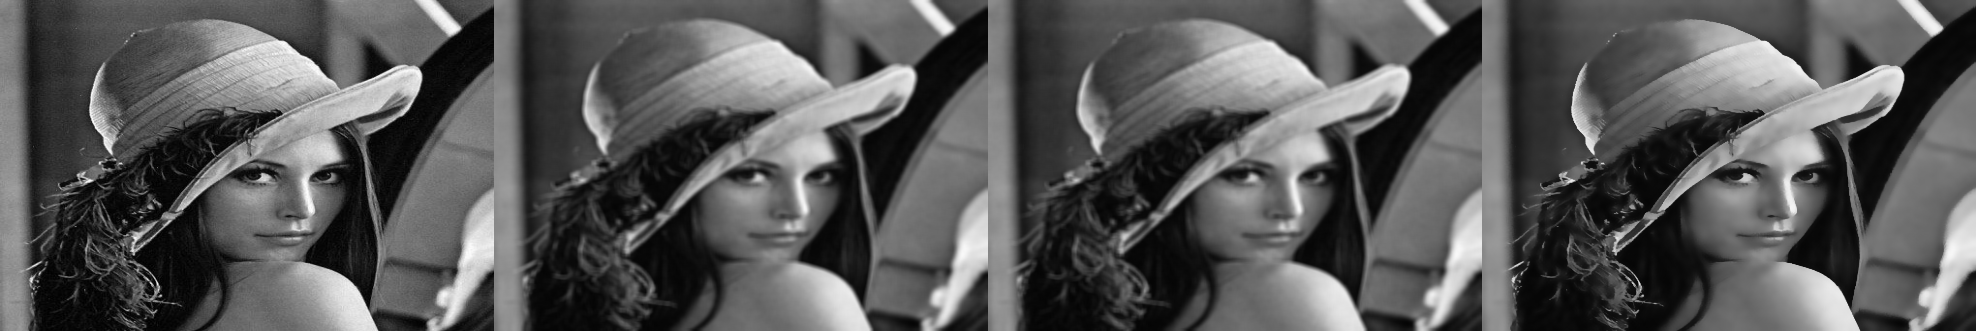

In [ ]:

# Apply different blurring techniques
box_blur = cv2.blur(image, (5, 5))  # Box blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 10)  # Gaussian blur
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)  # Adaptive blur

# Show results
combined = np.hstack((image, box_blur, gaussian_blur, adaptive_blur))
cv2_imshow(combined)

In [ ]:
#Task 2

In [ ]:


# ----------------- Model 1: Support Vector Machine (SVM) -----------------
# svm_model = SVC(kernel='rbf', probability=True)  # Use probability=True for ROC

# # Train the model using Cross Validation
# svm_scores = cross_val_score(svm_model, X_train, y_train, cv=kf, scoring='accuracy')

# # Train and predict on validation set
# svm_model.fit(X_train, y_train)
# y_pred_svm = svm_model.predict(X_val)
# y_pred_prob_svm = svm_model.predict_proba(X_val)[:, 1]  # Get probability for ROC curve

# ----------------- Model 2: Random Forest -----------------


# ----------------- Performance Metrics -----------------

# Function to compute evaluation metrics


# Evaluate SVM
svm_results = evaluate_model(y_val, y_pred_svm, y_pred_prob_svm)


# Print Results
print("\n--- SVM Results ---")
print(f"Accuracy: {svm_results[0]:.4f}")
print(f"Precision: {svm_results[1]:.4f}")
print(f"Recall: {svm_results[2]:.4f}")
print(f"F1-Score: {svm_results[3]:.4f}")
print(f"AUC: {svm_results[7]:.4f}")

# ----------------- Visualization -----------------

# Plot Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(svm_results[4], annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("SVM Confusion Matrix")

sns.heatmap(rf_results[4], annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")

plt.show()

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(svm_results[5], svm_results[6], label=f'SVM AUC: {svm_results[7]:.4f}', linestyle='--')



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



--- Random Forest Results ---
Accuracy: 0.9693
Precision: 0.9693
Recall: 0.9693
F1-Score: 0.9693
AUC: 0.3742


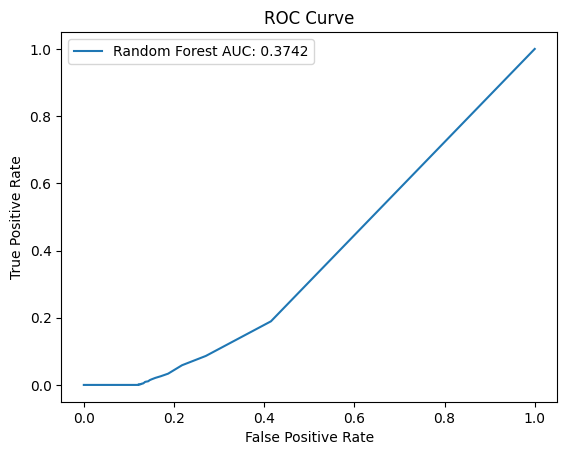

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (scale pixel values to 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the images (28x28 → 784 features)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Split data into training (80%) and testing (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using Cross Validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')

# Train and predict on validation set
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
y_pred_prob_rf = rf_model.predict_proba(X_val)[:, 1]  # Get probability for ROC curve
def evaluate_model(y_true, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob, pos_label=9)  # Only for digit 9
    auc_score = auc(fpr, tpr)

    return accuracy, precision, recall, f1, conf_matrix, fpr, tpr, auc_score
rf_results = evaluate_model(y_val, y_pred_rf, y_pred_prob_rf)

print("\n--- Random Forest Results ---")
print(f"Accuracy: {rf_results[0]:.4f}")
print(f"Precision: {rf_results[1]:.4f}")
print(f"Recall: {rf_results[2]:.4f}")
print(f"F1-Score: {rf_results[3]:.4f}")
print(f"AUC: {rf_results[7]:.4f}")
plt.plot(rf_results[5], rf_results[6], label=f'Random Forest AUC: {rf_results[7]:.4f}', linestyle='-')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Evaluate Random Forest on the test set
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train_full = X_train_full.reshape(X_train_full.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Split into 80% train, 20% test
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Models
models = {
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),  # SVM with RBF kernel
}

# Store results
results = {}

# Train and evaluate SVM
for name, model in models.items():
    print(f"\nTraining {name} model...\n")

    # Perform K-Fold Cross Validation
    accuracy_scores = []

    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        model.fit(X_train_fold, y_train_fold)  # Train model
        y_pred_fold = model.predict(X_val_fold)  # Predict on fold
        accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))  # Store accuracy

    # Train on full training data
    model.fit(X_train, y_train)

    # Make predictions on validation set
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)  # Get probabilities for ROC AUC

    # Compute evaluation metrics
    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Compute ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Store results
    results[name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
        "ROC AUC": roc_auc
    }

    print(f"Model: {name}")
    print(f"Mean Cross-Validation Accuracy: {np.mean(accuracy_scores):.4f}")
    print(f"Validation Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()



Training SVM model...



KeyboardInterrupt: 